In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve,plot_precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
import gc
gc.enable()

In [124]:
def logistic(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    prob=lr.predict_proba(X_test)
    return (prob[:,1],y_test)

In [125]:
def plot_pre_curve(y_test,probs):
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    plt.title("precision recall curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the plot
    plt.show()
    
def plot_roc(y_test,prob):
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    # show the plot
    plt.show()

In [126]:
df=pd.read_csv('/mnt/d/creditcard.csv')

In [127]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [128]:

X = df.drop('Class', axis=1)
y = df['Class']

In [129]:
X_smote, y_smote = SMOTE().fit_sample(X, y)
#X_smote, y_smote = ADASYN().fit_sample(X, y)

In [130]:
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)
y_smote.iloc[:, 0].value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.3, random_state=0
)

In [132]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [133]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy (train) for smote- decision tree: 99.8% 


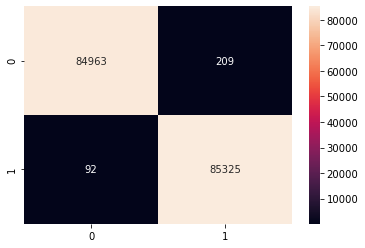

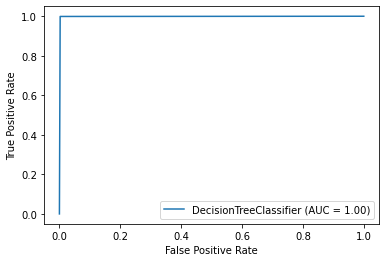

In [134]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import seaborn as sns

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
name = 'smote- decision tree'
print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

svc_disp = plot_roc_curve(clf, X_test, y_test)

In [135]:
from imblearn.over_sampling import ADASYN

X_adasyn, y_adasyn = ADASYN().fit_sample(X, y)


In [137]:
X_adasyn = pd.DataFrame(X_adasyn)
y_adasyn = pd.DataFrame(y_adasyn)
y_adasyn.iloc[:, 0].value_counts()

0    284315
1    284298
Name: Class, dtype: int64

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_adasyn, y_adasyn, test_size=0.3, random_state=0
)

In [139]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Accuracy (train) for ADASYN- decision tree: 99.8% 


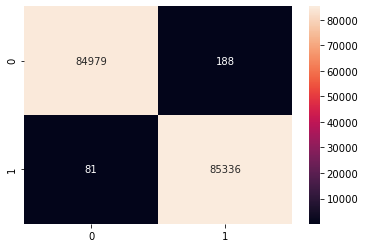

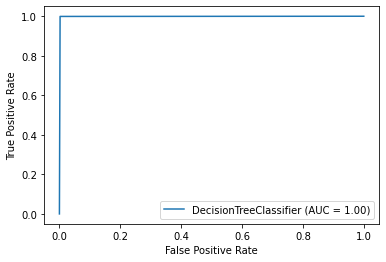

In [140]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
name = 'ADASYN- decision tree'
print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

svc_disp = plot_roc_curve(clf, X_test, y_test)

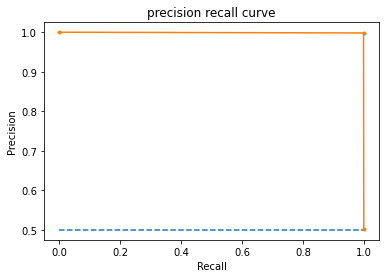

In [15]:
plot_pre_curve(y_test, y_pred)